In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC

# Import estimators
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

# Import cross validation
from sklearn.cross_validation import train_test_split


C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Principal Component Analysis

In [2]:
#import data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#remove ID 
rawData.drop('ID', axis = 1, inplace=True)
#rename 'default payment next month' to DEFAULT
rawData.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
rawData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [4]:
X = rawData.drop('DEFAULT', 1)  
y = rawData['DEFAULT']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [7]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [8]:
explained_variance = pca.explained_variance_ratio_

In [9]:
explained_variance

array([0.28291179, 0.17828903, 0.07059329, 0.06485326, 0.04454818,
       0.04227015, 0.04000862, 0.03798659, 0.03714189, 0.03225093,
       0.03070625, 0.02996609, 0.02494154, 0.02293955, 0.0172549 ,
       0.01137556, 0.01098053, 0.00823419, 0.00571656, 0.00310531,
       0.0017889 , 0.00110693, 0.00102997])

In [10]:
pca = PCA(n_components=2)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [11]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))

[[6858  202]
 [1582  358]]
0.8017777777777778


In [13]:
kNNclassifier = KNeighborsClassifier(n_neighbors=4, n_jobs=2)  
kNNclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = kNNclassifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))

[[6727  333]
 [1537  403]]
0.7922222222222223


In [15]:
SVCclassifier = SVC(C=3.0)  
SVCclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = SVCclassifier.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))

[[6742  318]
 [1414  526]]
0.8075555555555556


In [19]:
GBCclassifier = GradientBoostingClassifier(random_state=0)  
GBCclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = GBCclassifier.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))

[[6734  326]
 [1399  541]]
0.8083333333333333


# Feature Elimination

In [35]:
# method from https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models#
# First extract the target variable which is our House prices
Y = rawData.iloc[:, 23].values
# Drop price from the house dataframe and create a matrix out of the house data
X = rawData.iloc[:, :-1].values
rawData = rawData.drop(['DEFAULT'], axis=1)
# Store the column/feature names into a list "colnames"
colnames = rawData.columns

In [36]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [37]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [38]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
print(ranks["RFE"])

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
{'LIMIT_BAL': 0.23, 'SEX': 0.86, 'EDUCATION': 0.77, 'MARRIAGE': 0.91, 'AGE': 0.59, 'PAY_0': 1.0, 'PAY_2': 0.95, 'PAY_3': 0.82, 'PAY_4': 0.68, 'PAY_5': 0.73, 'PAY_6': 0.64, 'BILL_AMT1': 0.5, 'BILL_AMT2': 0.32, 'BILL_A

In [80]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)
#Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)
#Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [81]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [82]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
LIMIT_BAL	0.0	0.0	0.33	0.23	0.0	0.0	0.09
SEX	0.0	0.15	0.01	0.86	0.15	0.0	0.19
EDUCATION	0.0	0.16	0.07	0.77	0.16	0.0	0.19
MARRIAGE	0.0	0.25	0.02	0.91	0.25	0.0	0.24
AGE	0.02	0.01	0.43	0.59	0.01	0.0	0.18
PAY_0	1.0	1.0	1.0	1.0	1.0	0.0	0.83
PAY_2	0.08	0.2	0.18	0.95	0.2	0.0	0.27
PAY_3	0.0	0.12	0.01	0.82	0.12	0.0	0.18
PAY_4	0.0	0.04	0.0	0.68	0.04	0.0	0.13
PAY_5	0.0	0.06	0.0	0.73	0.06	0.0	0.14
PAY_6	0.0	0.01	0.02	0.64	0.01	0.0	0.11
BILL_AMT1	0.0	0.0	0.37	0.5	0.0	0.0	0.14
BILL_AMT2	0.0	0.0	0.25	0.32	0.0	0.0	0.1
BILL_AMT3	0.0	0.0	0.23	0.09	0.0	0.0	0.05
BILL_AMT4	0.0	0.0	0.22	0.14	0.0	0.0	0.06
BILL_AMT5	0.0	0.0	0.21	0.0	0.0	0.0	0.03
BILL_AMT6	0.0	0.0	0.26	0.18	0.0	0.0	0.07
PAY_AMT1	0.0	0.0	0.25	0.55	0.0	0.0	0.13
PAY_AMT2	0.0	0.0	0.27	0.36	0.0	0.0	0.1
PAY_AMT3	0.0	0.0	0.3	0.05	0.0	0.0	0.06
PAY_AMT4	0.0	0.0	0.24	0.41	0.0	0.0	0.11
PAY_AMT5	0.0	0.0	0.24	0.45	0.0	0.0	0.12
PAY_AMT6	0.0	0.0	0.28	0.27	0.0	0.0	0.09


In [83]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

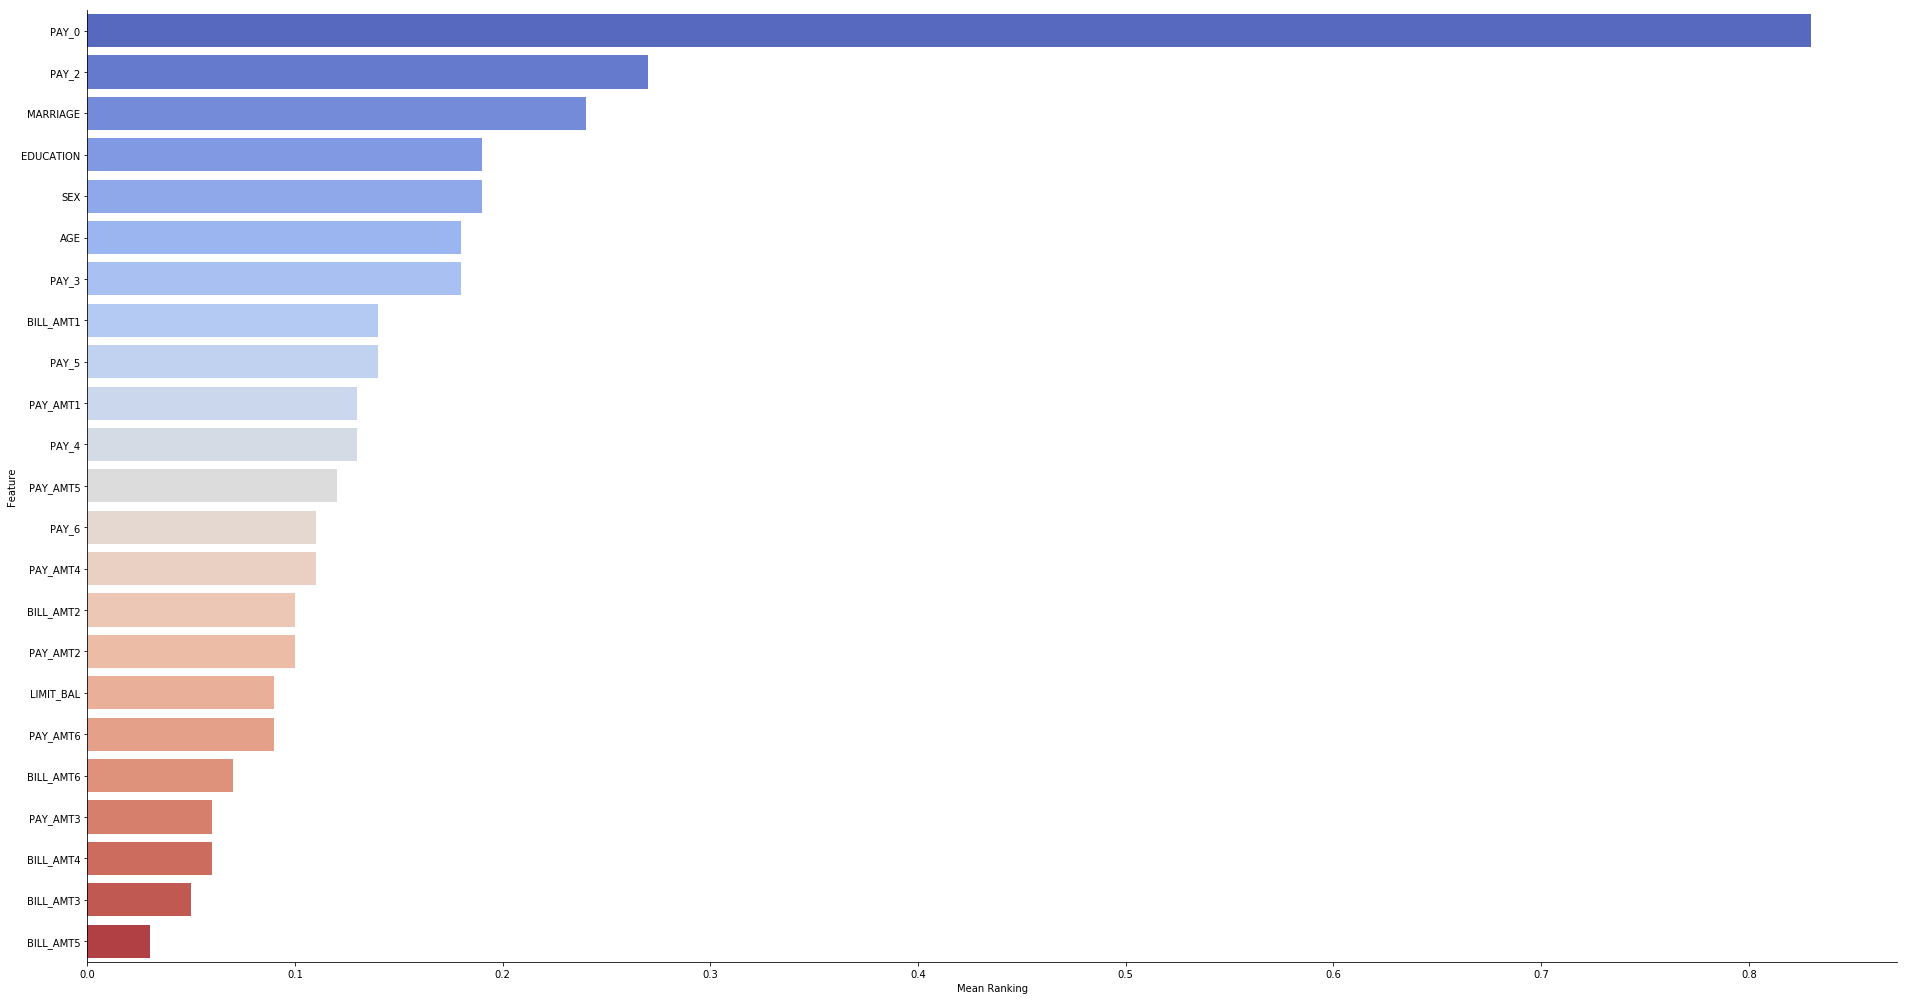

In [84]:
#Plot features ranking
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [85]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


In [66]:
#import data
rawData2 = pd.read_csv('default of credit card clients.csv', header=1)
rawData2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [67]:
#remove ID 
rawData2.drop('ID', axis = 1, inplace=True)
#rename 'default payment next month' to DEFAULT
rawData2.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
rawData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [77]:
#Convert df to numpy array
array = rawData2.values
X = array[:,0:23]
Y = array[:,23]

In [11]:
# Import your necessary dependencies for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [159]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 11)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 11
Selected Features: [False  True  True  True  True  True  True  True  True  True  True False
 False False False False False  True False False False False False]
Feature Ranking: [ 9  1  1  1  1  1  1  1  1  1  1  6  7 11 13  8 12  1  2  5  3  4 10]


In [13]:
# Ridge regression
from sklearn.linear_model import Ridge

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [16]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.0 * X0 + -0.015 * X1 + -0.015 * X2 + -0.024 * X3 + 0.001 * X4 + 0.096 * X5 + 0.019 * X6 + 0.012 * X7 + 0.003 * X8 + 0.006 * X9 + 0.001 * X10 + -0.0 * X11 + 0.0 * X12 + 0.0 * X13 + -0.0 * X14 + -0.0 * X15 + 0.0 * X16 + -0.0 * X17 + -0.0 * X18 + -0.0 * X19 + -0.0 * X20 + -0.0 * X21 + -0.0 * X22


In [68]:
#remove features 
rawData2 = rawData2.drop(['SEX', 'AGE', 'PAY_3', 'BILL_AMT2', 'PAY_AMT2', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)

In [69]:
rawData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
LIMIT_BAL    30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


In [70]:
rawData2.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'DEFAULT'], dtype='object')

In [71]:
#combine values of 'others' in education
x = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
rawData2.EDUCATION = rawData2.EDUCATION.replace(x)
rawData2.EDUCATION.describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [72]:
#remove limit balance values higher than 6k
rawData2 = rawData2[rawData2['LIMIT_BAL']< 600000]
rawData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29905 entries, 0 to 29999
Data columns (total 6 columns):
LIMIT_BAL    29905 non-null int64
EDUCATION    29905 non-null int64
MARRIAGE     29905 non-null int64
PAY_0        29905 non-null int64
PAY_2        29905 non-null int64
DEFAULT      29905 non-null int64
dtypes: int64(6)
memory usage: 1.6 MB


In [73]:
#features
features = rawData2.iloc[:,0:5]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,PAY_2
0,20000,2,1,2,2
1,120000,2,2,-1,2
2,90000,2,2,0,0
3,50000,2,1,0,0
4,50000,2,1,-1,0


In [74]:
#dependent variable
depVar = rawData2['DEFAULT']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [75]:
#Training Set (Feature Space: X Training)
X_train = (features[: 15000])
X_train.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,PAY_2
0,20000,2,1,2,2
1,120000,2,2,-1,2
2,90000,2,2,0,0
3,50000,2,1,0,0
4,50000,2,1,-1,0


In [76]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 15000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 15000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [77]:
#Testing Set (X Testing)
X_test = features[-4500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 4500
       LIMIT_BAL  EDUCATION  MARRIAGE  PAY_0  PAY_2
25483     100000          2         1      1     -2
25484      70000          3         2      2      0
25485     250000          1         2      0      0
25487     320000          2         1      0      0
25488     180000          2         2      0      0


In [78]:
#Ground Truth (y_test) 
y_test = depVar[-4500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 4500


25483    1
25484    1
25485    0
25487    0
25488    0
Name: DEFAULT, dtype: int64

In [79]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 1)
X_train.shape, X_test.shape

((10500, 5), (4500, 5))

In [80]:
# Models
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelSVC = SVC()
modelGBC = GradientBoostingClassifier()

In [45]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,MARRIAGE,PAY_0,PAY_2
0,1,2,2
1,2,-1,2
2,2,0,0
3,1,0,0
4,1,-1,0


In [31]:
#dependent variable
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [81]:
#fit models
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
modelGBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [85]:
#model fitting and scoring RF
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[0.77720651 0.77828571 0.7676479 ]


0.8419047619047619

In [86]:
#model fitting and scoring KNN
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.77149386 0.77514286 0.76964847]


0.8123809523809524

In [87]:
#model fitting and scoring SVC
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

[0.79205941 0.79371429 0.78736782]


0.8159047619047619

In [88]:
#model fitting and scoring GBC
modelGBC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelGBC.score(X_train, y_train)

[0.79205941 0.79371429 0.78736782]


0.810952380952381

In [89]:
# Make Predictions RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.786
Kappa: 0.284


In [90]:
# Make Predictions KNN
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.788
Kappa: 0.267


In [91]:
# Make Predictions SVC
predictions = modelSVC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.802
Kappa: 0.268


In [92]:
# Make Predictions GBC
predictions = modelGBC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.815
Kappa: 0.324
